In [ ]:
# Step 1: Install Required Libraries:

In [ ]:
!pip install better-profanity
!pip install textblob

In [ ]:
# Step 2: Import Essential Libraries:

In [ ]:
# Import Basic Libraries
import re
import os
import pandas as pd
import numpy as np
from datetime import datetime

from better_profanity import profanity
from textblob import TextBlob

# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import NLP Libraries
import nltk
from nltk.corpus import stopwords

# downloading stopwords
nltk.download('stopwords')

# Remove distarcting warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 3: Load the Tweet Data:

In [ ]:
import pandas as pd

for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
    for filename in filenames:
        if filename.endswith('.csv'):  # Check if it's a CSV file
            tweets = os.path.join(dirname, filename)
            df = pd.read_csv(tweets)  # Read the CSV file within each iteration

            print("Data Shape is :", df.shape)
            print("\nShow Top 10 Records")
            print(df.head(10))


Data Shape is : (50001, 8)

Show Top 10 Records
  Unnamed: 0             User  \
0          0      AnandPatni8   
1          1         dhinamum   
2          2     PrincetonCGI   
3          3     RishiJoeSanu   
4          4     itweetsensee   
5          5  FreeMindKeenEye   
6          6     SamsSamsson6   
7          7     SamsSamsson6   
8          8     SamsSamsson6   
9          9       ncsukumar1   

                                               Tweet  Likes  Retweets  \
0  @vinodkapri @RahulGandhi Respected Indian Citi...    0.0       0.0   
1  *Respected Indian Citizens,* Namaskaar I Am Th...    0.0       0.0   
2  1/n-Meet Filmmaker Prakash Jha in New Jersey t...    0.0       0.0   
3  @MrinalWahal Why would politicians stop using ...    0.0       0.0   
4  @annamalai_k @narendramodi A state level presi...    0.0       0.0   
5  @IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...    0.0       0.0   
6  @darrengrimes_ Why are pakistani /indian dual ...    0.0       0.0   
7  @

This will output a choose file widget that takes us to our local drive:

from google.colab import files


uploaded = files.upload()

If I need to use this option, I will change the cell type to a "code" cell & execute.

import io

df = pd.read_csv(io.BytesIO(uploaded['file.csv']))
print(df)

importing csv file into a pandas dataframe.
If I need to use this option, I will change the cell type to a "code" cell & execute.

From Github:
It is the easiest way to upload a CSV file in Colab. For this go to the dataset in your GitHub repository, and then click on “View Raw”. Copy the link to the raw dataset and pass it as a parameter to the read_csv() in pandas to get the dataframe.

In [ ]:
# I will uncomment if I need to use this method
# url = 'copied_raw_github_link'
# df = pd.read_csv(url)


In [1]:
# Step 4: Data Exploration and Cleaning

In [ ]:
print("Data Shape is :", df.shape)
print("\nShow Top 10 Records")
df.head(10)

# Checking Missing Values
df.isna().sum()

# Drop NA Value
df.dropna(inplace=True)

# Checking Duplicates
df.duplicated().sum()

# Checking Data Types
df.info()

# Checking the number of unique values of each column
df.nunique()

# Print numerical and categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))


Data Shape is : (50001, 8)

Show Top 10 Records
<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 50000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   User        49999 non-null  object 
 2   Tweet       49999 non-null  object 
 3   Likes       49999 non-null  float64
 4   Retweets    49999 non-null  float64
 5   date        49999 non-null  object 
 6   month       49999 non-null  object 
 7   hour        49999 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB
We have 2 numerical columns(features) : ['Likes', 'Retweets']

We have 6 categorical columns(features) : ['Unnamed: 0', 'User', 'Tweet', 'date', 'month', 'hour']


#### This step incudes:
#### 1. Processing missing & NaN entries. Fortunately, there were no missing or irrelevant values to be treated.
#### 2. Hence, my data processing steps included seperaing columns like date, month, hour from the "Date" column (present in DateTime format) already present. I worked that out in a different
#### notebook, downloaded the resultant csv file & uploaded here.

#### The **notebook** containing the code & giving option to save it to my desired file path on local drive, will also be uploaded with the name "Date time extraction"

In [ ]:
# Different nltk modules & lists download (you don't need this step if you already have them downloaded. But its preferable to include this step)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Step 5: Data Preprocessing

#### This step incuded:
#### 1. Processing missing & NaN entries. Fortunately, there were no missing or irrelevant values to be treated.
#### 2. Hence, my data processing steps included seperaing columns like date, month, hour from the "Date" column (present in DateTime format) already present. I worked that out in a different
#### notebook, downloaded the resultant csv file & uploaded here.


In [ ]:
# Step 6: Tweet Cleaning function: The most crucial step

#### Executing the following step

#### The Tweet cleaning step is **the most lengthy & time consuming step among all the steps**  ( took me 1.5 hours in the first attempt) because I was using loop and cleaning tweets was taking place inside the loop which is actioning each tweet one-by-one. So, cleaning 50k entries was too hectic for the system.

#### I then decided to apply Numpy array vector approach & tokenised the Tweets. Thanks to Gemini again for rendering such a neat & accurate code. This scaled up the process to astronomical magnitude & the tweet cleaning step was **completed in as small as 25 seconds!** The code is as follows:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords once (outside the loop)
nltk.download('stopwords')
stop_words = stopwords.words('english')

def clean_tweet(tweet):
  # Lowercase and tokenize the tweet
  tokens = word_tokenize(tweet.lower())

  # Remove punctuation and special characters using translation table
  table = str.maketrans('', '', '!@#$%^&*()-=+{};:\'"\\|,<.>/?`~')
  tokens = [word.translate(table) for word in tokens]

  # Remove stop words, hashtags, and URLs (using list comprehension)
  tokens = [word for word in tokens if word not in (stop_words + ['#', 'http'])]

  # Join the cleaned tokens back into a string
  return ' '.join(tokens)

# Apply clean_tweet function to the 'Tweet' column (vectorized)
df['Tweet'] = df['Tweet'].apply(clean_tweet)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,User,Tweet,Likes,Retweets,month,hour,Original_Tweet
0,0,AnandPatni8,vinodkapri rahulgandhi respected indian citi...,0.0,0.0,March,15:42,@vinodkapri @RahulGandhi Respected Indian Citi...
1,1,dhinamum,respected indian citizens namaskaar origina...,0.0,0.0,March,15:42,"*Respected Indian Citizens,* Namaskaar I Am Th..."
2,2,PrincetonCGI,1nmeet filmmaker prakash jha new jersey talkin...,0.0,0.0,March,15:34,1/n-Meet Filmmaker Prakash Jha in New Jersey t...
3,3,RishiJoeSanu,mrinalwahal would politicians stop using reli...,0.0,0.0,March,15:31,@MrinalWahal Why would politicians stop using ...
4,4,itweetsensee,annamalai_k narendramodi state level preside...,0.0,0.0,March,15:26,@annamalai_k @narendramodi A state level presi...


In [ ]:
# Step 7: Sentiment Analysis using TextBlob

In [ ]:

# Define the sentiment objects using TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in df['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Directly add the 'Polarity' column
df['Polarity'] = [tweet.sentiment.polarity for tweet in sentiment_objects]

# Create the Sentiment column using lambda function and apply()
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


# ... (rest of your code remains the same)

try:
  # ... (extract date and hour as before)

  # Select desired columns, ensuring "hour" is included
  df = df[['date', 'hour', 'month', 'year', 'Tweet', 'Polarity', 'Sentiment']]
except KeyError:
  # Handle missing columns as before
  print("Columns 'month', 'year', or 'DateTime' not found in DataFrame. Keeping only 'Tweet', 'Polarity', and 'Sentiment'.")
  df = df[['Tweet', 'Polarity', 'Sentiment', 'hour']]  # Add "hour" here

df.head()  # Display the DataFrame



Columns 'month', 'year', or 'DateTime' not found in DataFrame. Keeping only 'Tweet', 'Polarity', and 'Sentiment'.


,Tweet,Polarity,Sentiment,hour
0,vinodkapri rahulgandhi respected indian citi...,-0.062500,Negative,15:42
1,respected indian citizens namaskaar origina...,-0.062500,Negative,15:42
2,1nmeet filmmaker prakash jha new jersey talkin...,0.173232,Positive,15:34
3,mrinalwahal would politicians stop using reli...,0.000000,Neutral,15:31
4,annamalai_k narendramodi state level preside...,0.214286,Positive,15:26


In [ ]:
# Step 8: Sentiment Analysis Results

In [ ]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate sentiment percentages
positive_percent = sentiment_counts['Positive'] / len(df) * 100
negative_percent = sentiment_counts['Negative'] / len(df) * 100
neutral_percent = sentiment_counts['Neutral'] / len(df) * 100

# Print sentiment distribution percentages
print("%.2f percent of twitter users feel positive." %positive_percent)
print("%.2f percent of twitter users feel negative."%negative_percent)
print("%.2f percent of twitter users feel neutral."%neutral_percent)



44.77 percent of twitter users feel positive.
26.05 percent of twitter users feel negative.
29.18 percent of twitter users feel neutral.


In [ ]:
# Data Visualization

In [ ]:
# Sentiment labels (replace colors with sentiment names)
sentiment_labels = ['Positive', 'Negative', 'Neutral']

# Create the pie chart
fig = px.pie(values=sentiment_counts.values, names=sentiment_labels)

# Update pie chart layout
fig.update_traces(textinfo='percent+label')  # Display percentages and labels on pie chart slices
fig.update_layout(title_text='Sentiment Distribution', title_font_size=24)

# Display the chart
fig.show()


In [ ]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Set the color palette
colors = {'Positive': 'mediumseagreen', 'Negative': 'crimson', 'Neutral': 'royalblue'}

# Create a bar plot of the Sentiment column
fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values, color=sentiment_counts.index,
             color_discrete_map=colors)

# Set the chart title and axis labels
fig.update_layout(title_text='Countplot of Sentiment of the data', title_font_size=24,
                  xaxis_title='Sentiment', yaxis_title='Count')

# Display the chart
fig.show()

In [ ]:
df.head()

,Tweet,Polarity,Sentiment,hour
0,vinodkapri rahulgandhi respected indian citi...,-0.062500,Negative,15:42
1,respected indian citizens namaskaar origina...,-0.062500,Negative,15:42
2,1nmeet filmmaker prakash jha new jersey talkin...,0.173232,Positive,15:34
3,mrinalwahal would politicians stop using reli...,0.000000,Neutral,15:31
4,annamalai_k narendramodi state level preside...,0.214286,Positive,15:26


In [ ]:
# Step 9: Sentiment by Hour: using polar plot

In [ ]:

import numpy as np
# Create a radar plot with a custom layout
fig = px.line_polar(
    data_frame=hourly,
    r='Number of tweets',
    theta='Hour of Day',
    line_close=True,
    color_discrete_sequence=['crimson'],
    template='plotly_dark',  # Use a dark theme for better visibility
    width=1200,  # Increase plot width
    height=1000  # Increase plot height
)

# Update layout
fig.update_layout(
    title='Time of Day with Most Tweets',
    title_x=0.5,
    title_font_size=24,  # Increase title font size
    polar={
        'radialaxis': {'visible': True, 'range': [0, 100]},  # Make radial axis visible and set range
        'angularaxis': {'tickfont': {'size': 14}}  # Increase tick font size
    },
    showlegend=False
)

# Add annotations for each hour
for i in range(24):
    fig.add_annotation(
        text=str(i),
        x=np.cos(2 * np.pi * i / 24),
        y=np.sin(2 * np.pi * i / 24),
        showarrow=False,
        font=dict(color='white', size=14)
    )

# Display the plot
fig.show()


In [ ]:
# Seperately categorising tweets as total no. of positive tweet, total no. of negative tweet, total no. of neutral tweet &
# the time of the day tweeted

In [ ]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    return h + ":00"

sentiment_hourly = df.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=sentiment_hourly,
    r=sentiment_hourly['Number of Tweets'],
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)

# Update layout for larger size and black background
fig.update_layout(
    title="Time of Day no. of positive tweet, no. of negative tweet, no. of neutral tweet",
    title_x=0.5,
    template="ggplot2",
    width=1200,  # Set width to 1200
    height=1000,  # Set height to 1000
    paper_bgcolor='white',  # Set background color to black
)

fig.show()


In [ ]:
# Assuming your dataset is stored in a variable called df
hourly_sentiment = df.groupby(['hour', 'Sentiment']).size().reset_index(name='Count')

# Creating separate dataframes for each sentiment
positive_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Positive']
negative_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Negative']
neutral_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Neutral']

# Plotting the combo bar graph
fig = go.Figure()

fig.add_trace(go.Bar(x=positive_df['hour'], y=positive_df['Count'], name='Positive', marker_color='green'))
fig.add_trace(go.Bar(x=negative_df['hour'], y=negative_df['Count'], name='Negative', marker_color='crimson'))
fig.add_trace(go.Bar(x=neutral_df['hour'], y=neutral_df['Count'], name='Neutral', marker_color='royalblue'))

fig.update_layout(barmode='group', xaxis_title='Hour of the day', yaxis_title='Number of Tweets', title='Hourly Number of Tweets by Sentiment')
fig.show()

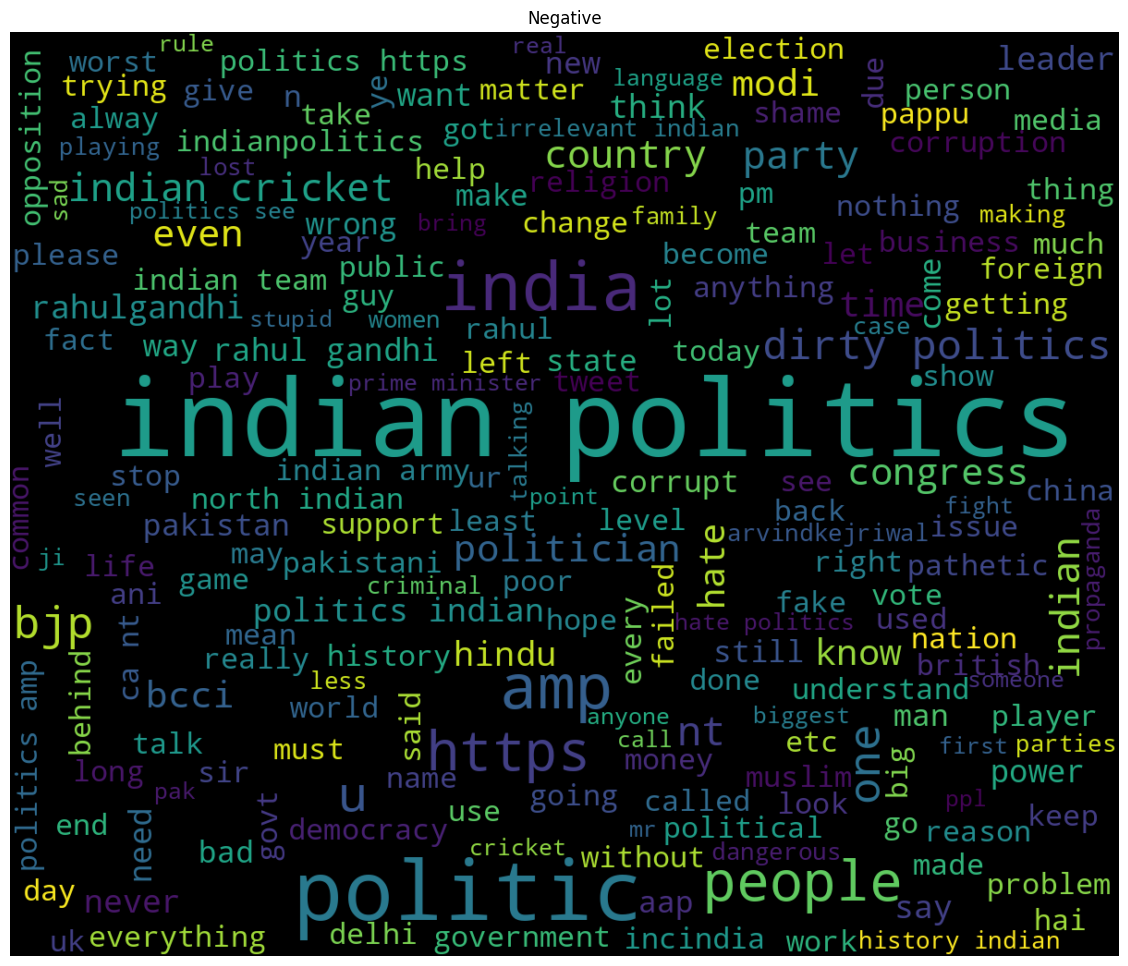

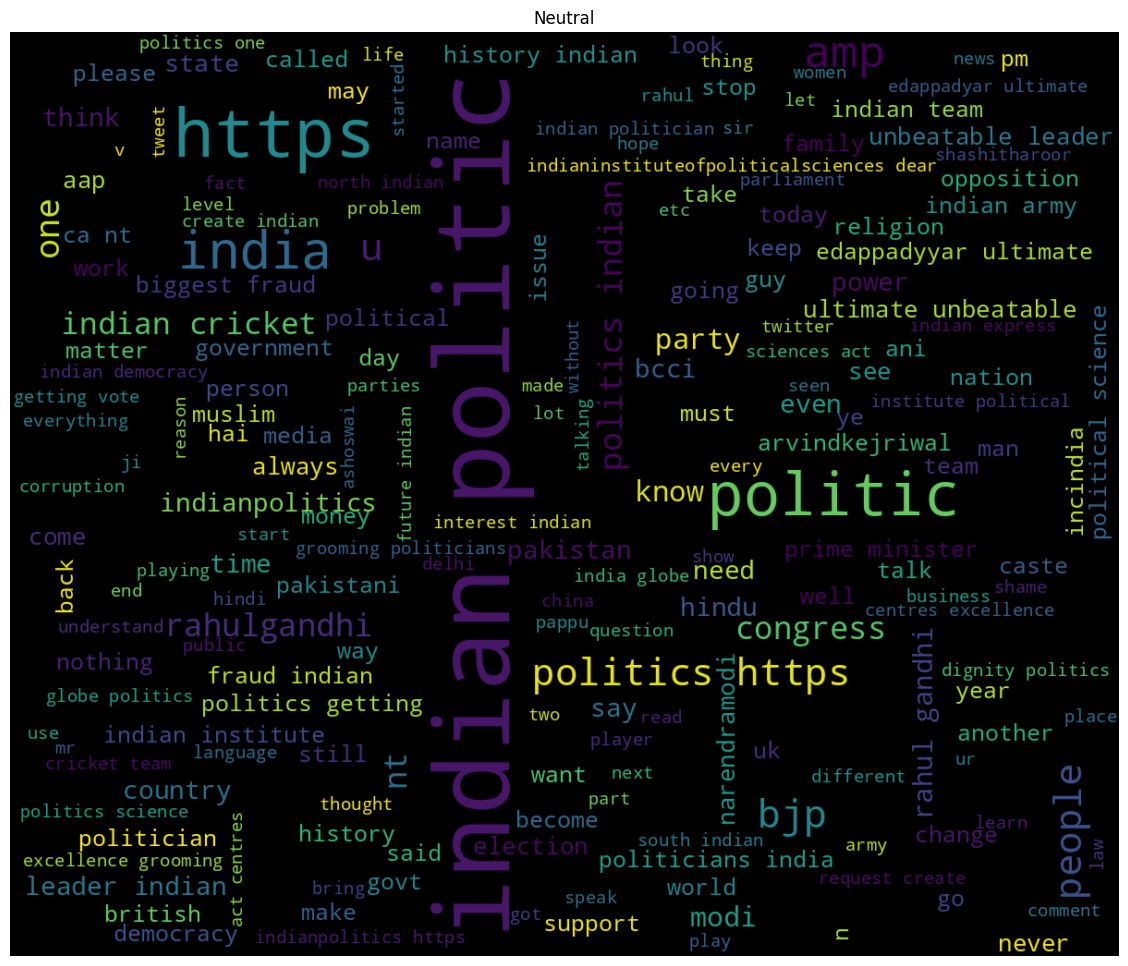

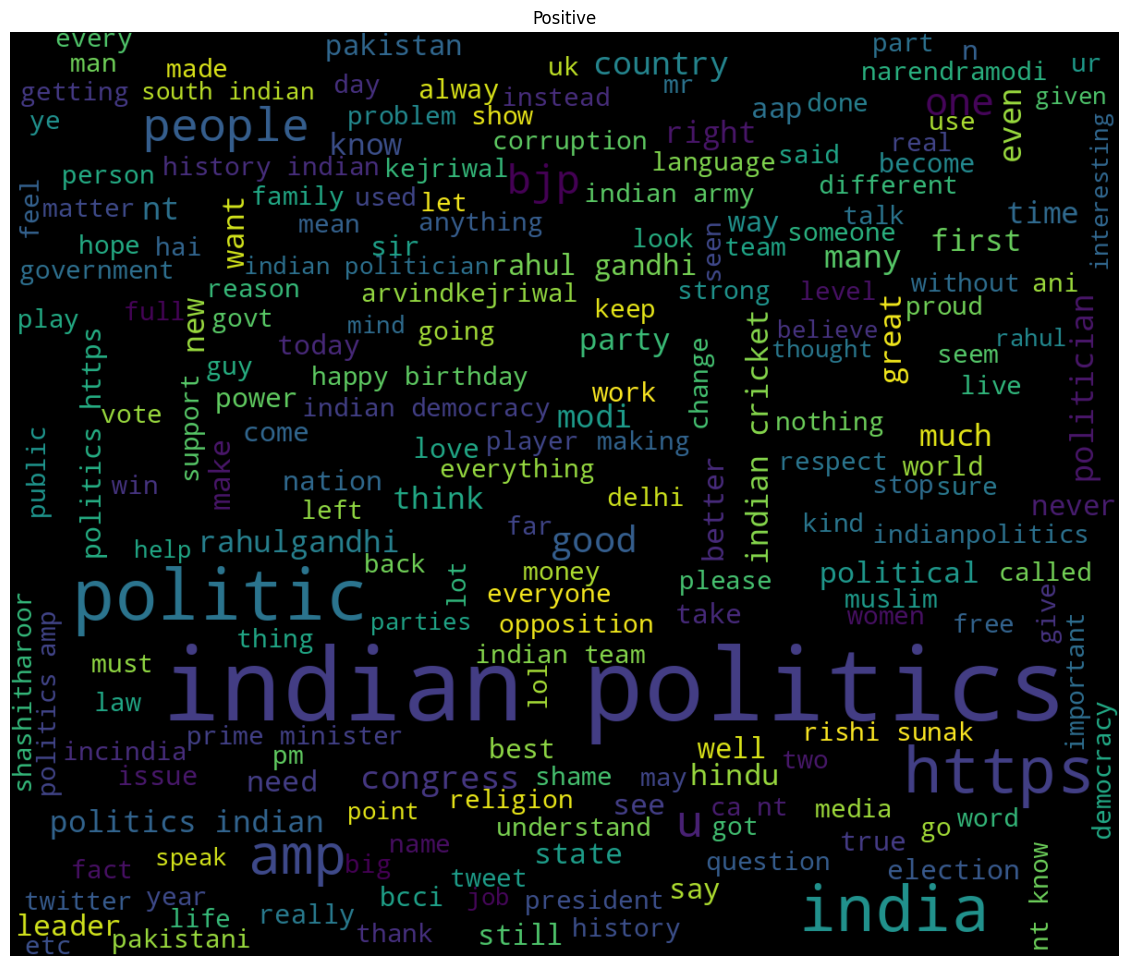

In [ ]:
# prompt: generate different wordclouds pictures seperately for different sentiments

import matplotlib.pyplot as plt
# Assuming your dataset is stored in a variable called df
# Group the tweets by sentiment and concatenate them into a single string
sentiment_groups = df.groupby('Sentiment')
text_by_sentiment = {}
for sentiment, group in sentiment_groups:
    text_by_sentiment[sentiment] = ' '.join(group['Tweet'].tolist())

# Generate a wordcloud for each sentiment
for sentiment, text in text_by_sentiment.items():
    wordcloud = WordCloud(background_color='black', width=1200, height=1000).generate(text)
    plt.figure(figsize=(20,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()
